**Packages needs to be imported**

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Loading data**

In [5]:
url='https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df=pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['gender']=df['gender'].map({'Male':1,'Female':0})
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

**feature selection for model building**

In [16]:
feature=['gender','SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
empty_values=df[feature].isnull().sum() + (df[feature]=='').sum()
total_rows=len(df)
empty_summary=pd.DataFrame({
    'Empty Values':empty_values,
    'Empty Percentage':(empty_values/total_rows)*100
})
print(empty_summary)
print('--'*10)
df[feature].dtypes

                Empty Values  Empty Percentage
gender                     0          0.000000
SeniorCitizen              0          0.000000
tenure                     0          0.000000
MonthlyCharges             0          0.000000
TotalCharges              11          0.156183
--------------------


,0
gender,int64
SeniorCitizen,int64
tenure,int64
MonthlyCharges,float64
TotalCharges,float64


In [17]:
df.dropna(inplace=True)

**Initilizing X and y**

In [20]:
X=df[feature]
y=df['Churn']

**Spliting training and testing data**

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=30)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

**Model Building**

In [24]:
model=models.Sequential([
    layers.Dense(64,activation='relu',input_shape=(5,)), #Input method
    layers.Dense(32,activation='relu'), #1st hidden layer
    layers.Dense(16,activation='relu'), #2nd hidden layer
    layers.Dense(8,activation='relu'),  #3rd hidden layer
    layers.Dense(1,activation='sigmoid')  #Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history=model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.20,verbose=1)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7036 - loss: 0.5663 - val_accuracy: 0.8062 - val_loss: 0.4395
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7827 - loss: 0.4499 - val_accuracy: 0.7956 - val_loss: 0.4393
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7774 - loss: 0.4603 - val_accuracy: 0.8133 - val_loss: 0.4275
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7864 - loss: 0.4482 - val_accuracy: 0.8071 - val_loss: 0.4302
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.4335 - val_accuracy: 0.8098 - val_loss: 0.4280
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7834 - loss: 0.4512 - val_accuracy: 0.8089 - val_loss: 0.4264
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7864 - loss: 0.4540 - val_accuracy: 0.8169 - val_loss: 0.4276
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7869 - loss: 0.4450 - val_accuracy: 0.

In [28]:
loss,accuracy=model.evaluate(X_test_scaled,y_test)
print(f'model loss {loss}')
print(f'model accuracy {accuracy*100}')

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.4285
model loss 0.43629008531570435
model accuracy 79.03340458869934


In [30]:
y_pred=model.predict(X_test_scaled)
y_pred_classes=(y_pred>0.5).astype(int).reshape(-1)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


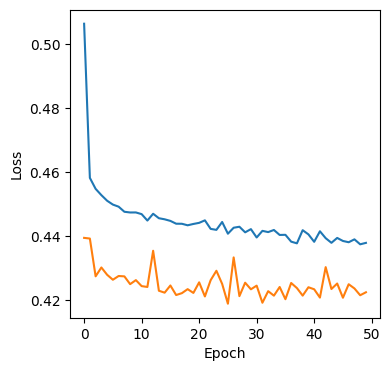

In [35]:
plt.figure(figsize=(4,4))
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()